In [17]:

import backtrader as bt
import backtrader.feeds as btfeeds
import matplotlib.pyplot as plt
import numpy as np
import warnings

import datetime as datetime
import pandas as pd
from research import BtPipMiner

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [18]:
# Test Data
def get_data(symbol:str):
    symbol = symbol.upper()
    try:
        datapath = f'/Users/jerryinyang/Code/quantbt/data/prices/{symbol}.parquet'
        csv = pd.read_parquet(datapath)
        csv = np.log(csv)
        csv.to_csv(f'/Users/jerryinyang/Code/quantbt/data/prices/{symbol}.csv', index=True)
    except Exception as e:
        ...

    return f'/Users/jerryinyang/Code/quantbt/data/prices/{symbol}.csv'



In [19]:
# Initialize Engine
cerebro = bt.Cerebro()
cerebro.broker.setcash(1000000.0)

data_path = get_data('btcusdt')

# Add Strategy/Model
cerebro.addstrategy(BtPipMiner, 4, 20, 4, data_path)

# Create a Data Feed
data = btfeeds.GenericCSVData(
    dataname=data_path,

    fromdate=datetime.datetime(2018, 1, 1),
    todate=datetime.datetime(2022, 12, 31),

    nullvalue=0.0,

    dtformat=('%Y-%m-%d %H:%M:%S'),
    # dtformat=('%Y-%m-%d'),

    datetime=0,
    open=1,
    high=2,
    low=3,
    close=4,
    volume=5,
    openinterest=-1
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

cerebro.run()


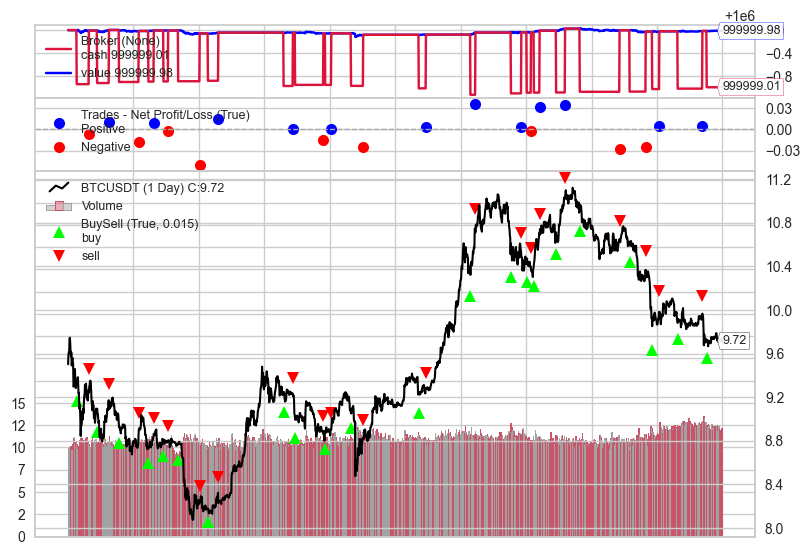

[[<Figure size 800x550 with 4 Axes>]]

: 

In [20]:
%matplotlib inline
cerebro.plot(iplot=False)
# print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())